# Goal: eliminate bad light curves

I'm generating a light curve for each match specifically because I want to flag which ones 

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import astropy.table
from astropy.coordinates import SkyCoord, Angle
from astropy import units as u

from wuvars.data import spreadsheet, photometry, quality_classes
from wuvars.analysis.spectral_type_to_number import get_num_from_SpT
from wuvars.analysis.luhman16_coord_handler import coords_from_Luhman_table

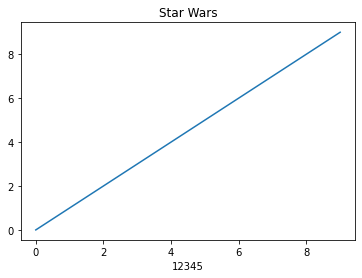

In [2]:
# testing something: pdf figure copy/paste

fig = plt.figure()
plt.plot(np.arange(10))
plt.title("Star Wars")
plt.xlabel("12345")

plt.savefig("test_figure.pdf")

# confirmed: yes, this works.

In [3]:
# now: a figure of a star which also lists these data quality attributes:
# Q = 0, 1(JHK), 2
# NJ / NJ_good / NJ_info / NJ_warn / NJ_severe (etc etc for H, K)
# median PSTAR


# ONC

In [87]:
%run ../bd_matching_onc.py

In [88]:
dat = photometry.group_wserv_v2(photometry.load_wserv_v2(5))


Loading WSERV5 photometry data... DONE (elapsed time: 0.31s)


In [89]:
q = quality_classes.load_q(5)

In [90]:
lowmass_match_sids = lowmass_joint_matches['SOURCEID']

In [91]:
def q_string(sid, spread, qualityset):
    
    q = qualityset
    
    if sid in spread[q.q2].index:
        return "2"

    elif sid in spread[q.q1_j | q.q1_h | q.q1_k].index:
        return_string = "1"

        if sid in spread[q.q1_j].index:
            return_string += "J"
        if sid in spread[q.q1_h].index:
            return_string += "H"            
        if sid in spread[q.q1_k].index:
            return_string += "K"
            
        return return_string
            
    elif sid in spread[q.q0].index:
        return "0"
    
    else:
        return "-1"
    



In [92]:
from wuvars.plotting.lightcurve import simple_lc, simple_lc_brokenaxes, onc_simple_lc_brokenaxes, onc_simple_lc_scatter_brokenaxes
from wuvars.analysis.sidsep import sidsep

lc_dir = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/prototypes/BD_lcs_v3"

for i, sid in enumerate(lowmass_match_sids):
    
    suptitle = ""
    
    suptitle += ("\n"+ f"{i} ONC : Robberto #{lowmass_matched['index'][i]} is {sidsep(sid)}.")
    suptitle += ("\n"+ f" Match: {d2d[sep_constraint][i].to(u.arcsec):.2f}")
    suptitle += ("\n"+ f" Mass={lowmass_matched['Mstar'][i]} Msun, Teff={lowmass_matched['Teff'][i]}")
    suptitle += ("\n"+ f" Stetson variability index:  S={spread['variability']['Stetson_JHK'].values[idx[sep_constraint & confident_lowmass][i]]:.2f}")
    suptitle += ("\n"+ " ")

    fig_lc = onc_simple_lc_scatter_brokenaxes(dat, sid,)
#     fig_lc.ax_j.set_title(f"{i} S-{table3['SONYC'][i]}. $S = {spread.wserv7['variability']['Stetson_JHK'].values[idx3[i]]:.2f}$")
    fig_lc.text(0.1, 0.925, suptitle, horizontalalignment='left', transform=fig_lc.transFigure, font='monospace', fontsize=14)

    data_quality_text = f"Q{q_string(sid, spread, q):4s}  "
    
    data_quality_text += f"N_J= {int(spread['count']['N_J'][sid]):3d} |"
    data_quality_text += f" {int(spread['count']['N_J_good'][sid]):3d}"
    data_quality_text += f" {int(spread['count']['N_J_info'][sid]):3d}"
    
    data_quality_text += f"\n       N_H= {int(spread['count']['N_H'][sid]):3d} |"
    data_quality_text += f" {int(spread['count']['N_H_good'][sid]):3d}"
    data_quality_text += f" {int(spread['count']['N_H_info'][sid]):3d}"

    data_quality_text += f"\n       N_K= {int(spread['count']['N_K'][sid]):3d} |"
    data_quality_text += f" {int(spread['count']['N_K_good'][sid]):3d}"
    data_quality_text += f" {int(spread['count']['N_K_info'][sid]):3d}"
    data_quality_text += f"\n       Pstar={spread['median']['PSTAR'][sid]:.2f}"

#     print(data_quality_text)
    
    
    fig_lc.text(
        0.65, 
        1.095, 
        data_quality_text, 
        horizontalalignment='left', 
        verticalalignment='top', 
        transform=fig_lc.transFigure, 
        font='monospace', 
        fontsize=14)
    
    
    fig_lc.savefig(os.path.join(lc_dir, f'ONC_{i:02d}_{sid}.png'), bbox_inches='tight', dpi=100)
    plt.close(fig_lc)
#     plt.show()
    
    
    
    
    
    

/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


In [47]:
for i, sid in enumerate(lowmass_match_sids):
    data_quality_text = "Q"+q_string(sid, spread, q) + "\t"
    
    data_quality_text += "N_J= " + str(int(spread['count']['N_J'][sid])) + " \t| "
    data_quality_text += " " + str(int(spread['count']['N_J_good'][sid]))
    data_quality_text += " " + str(int(spread['count']['N_J_info'][sid]))
    
    data_quality_text += "\n  \tN_H= " + str(int(spread['count']['N_H'][sid])) + " \t| "
    data_quality_text += " " + str(int(spread['count']['N_H_good'][sid]))
    data_quality_text += " " + str(int(spread['count']['N_H_info'][sid]))

    data_quality_text += "\n  \tN_K= " + str(int(spread['count']['N_K'][sid])) + " \t| "
    data_quality_text += " " + str(int(spread['count']['N_K_good'][sid]))
    data_quality_text += " " + str(int(spread['count']['N_K_info'][sid]))
    
    print(data_quality_text, '\n')
    
    

Q0	N_J= 130 	|  20 110
  	N_H= 157 	|  15 142
  	N_K= 158 	|  1 157 

Q2	N_J= 66 	|  66 0
  	N_H= 71 	|  71 0
  	N_K= 75 	|  75 0 

Q2	N_J= 66 	|  66 0
  	N_H= 71 	|  71 0
  	N_K= 75 	|  75 0 

Q2	N_J= 64 	|  64 0
  	N_H= 86 	|  86 0
  	N_K= 85 	|  85 0 

Q2	N_J= 66 	|  66 0
  	N_H= 71 	|  71 0
  	N_K= 75 	|  75 0 

Q2	N_J= 66 	|  66 0
  	N_H= 71 	|  71 0
  	N_K= 75 	|  75 0 

Q2	N_J= 66 	|  66 0
  	N_H= 71 	|  71 0
  	N_K= 75 	|  75 0 

Q2	N_J= 66 	|  66 0
  	N_H= 71 	|  71 0
  	N_K= 75 	|  75 0 

Q2	N_J= 65 	|  65 0
  	N_H= 71 	|  71 0
  	N_K= 75 	|  75 0 

Q2	N_J= 66 	|  66 0
  	N_H= 71 	|  71 0
  	N_K= 75 	|  75 0 

Q2	N_J= 66 	|  66 0
  	N_H= 70 	|  70 0
  	N_K= 75 	|  75 0 

Q0	N_J= 112 	|  112 0
  	N_H= 140 	|  140 0
  	N_K= 143 	|  143 0 

Q2	N_J= 66 	|  66 0
  	N_H= 71 	|  71 0
  	N_K= 75 	|  75 0 

Q2	N_J= 65 	|  65 0
  	N_H= 69 	|  69 0
  	N_K= 75 	|  75 0 

Q2	N_J= 66 	|  66 0
  	N_H= 71 	|  71 0
  	N_K= 75 	|  75 0 

Q2	N_J= 66 	|  66 0
  	N_H= 71 	|  71 0
  	N_K= 75 	|  7

Q2	N_J= 64 	|  64 0
  	N_H= 86 	|  86 0
  	N_K= 85 	|  85 0 

Q2	N_J= 64 	|  64 0
  	N_H= 86 	|  86 0
  	N_K= 85 	|  85 0 

Q2	N_J= 64 	|  64 0
  	N_H= 86 	|  86 0
  	N_K= 85 	|  85 0 

Q2	N_J= 64 	|  64 0
  	N_H= 85 	|  85 0
  	N_K= 85 	|  85 0 

Q2	N_J= 64 	|  64 0
  	N_H= 86 	|  86 0
  	N_K= 85 	|  85 0 

Q1JK	N_J= 63 	|  63 0
  	N_H= 86 	|  66 20
  	N_K= 85 	|  85 0 

Q0	N_J= 56 	|  0 56
  	N_H= 75 	|  0 75
  	N_K= 84 	|  0 84 

Q0	N_J= 64 	|  1 63
  	N_H= 82 	|  0 82
  	N_K= 85 	|  47 38 

Q1J	N_J= 66 	|  66 0
  	N_H= 140 	|  75 65
  	N_K= 159 	|  159 0 

Q0	N_J= 34 	|  14 20
  	N_H= 157 	|  145 12
  	N_K= 160 	|  134 26 

Q2	N_J= 63 	|  63 0
  	N_H= 86 	|  86 0
  	N_K= 85 	|  85 0 

Q1HK	N_J= 64 	|  21 43
  	N_H= 86 	|  86 0
  	N_K= 85 	|  85 0 

Q0	N_J= 44 	|  28 16
  	N_H= 57 	|  50 7
  	N_K= 10 	|  9 1 

Q0	N_J= 80 	|  77 3
  	N_H= 151 	|  145 6
  	N_K= 117 	|  117 0 

Q0	N_J= 61 	|  0 61
  	N_H= 82 	|  0 82
  	N_K= 85 	|  0 85 

Q0	N_J= 0 	|  0 0
  	N_H= 82 	|  60 22
  	N_K= 

Q1HK	N_J= 98 	|  98 0
  	N_H= 69 	|  69 0
  	N_K= 68 	|  68 0 

Q0	N_J= 1 	|  0 1
  	N_H= 65 	|  0 65
  	N_K= 72 	|  0 72 

Q1H	N_J= 47 	|  45 2
  	N_H= 69 	|  69 0
  	N_K= 11 	|  11 0 

Q-1	N_J= 0 	|  0 0
  	N_H= 3 	|  2 1
  	N_K= 10 	|  10 0 

Q0	N_J= 47 	|  13 34
  	N_H= 54 	|  48 6
  	N_K= 45 	|  43 2 

Q1J	N_J= 51 	|  51 0
  	N_H= 1 	|  0 1
  	N_K= 0 	|  0 0 

Q2	N_J= 47 	|  47 0
  	N_H= 69 	|  69 0
  	N_K= 68 	|  68 0 

Q1JH	N_J= 47 	|  47 0
  	N_H= 69 	|  69 0
  	N_K= 68 	|  50 18 

Q2	N_J= 47 	|  47 0
  	N_H= 69 	|  69 0
  	N_K= 68 	|  68 0 

Q2	N_J= 47 	|  47 0
  	N_H= 69 	|  69 0
  	N_K= 68 	|  68 0 

Q2	N_J= 47 	|  47 0
  	N_H= 69 	|  69 0
  	N_K= 68 	|  68 0 

Q2	N_J= 47 	|  47 0
  	N_H= 69 	|  69 0
  	N_K= 68 	|  68 0 

Q2	N_J= 47 	|  47 0
  	N_H= 69 	|  69 0
  	N_K= 68 	|  68 0 

Q0	N_J= 47 	|  0 47
  	N_H= 69 	|  0 69
  	N_K= 68 	|  0 68 

Q2	N_J= 47 	|  47 0
  	N_H= 69 	|  69 0
  	N_K= 68 	|  68 0 

Q2	N_J= 47 	|  47 0
  	N_H= 69 	|  69 0
  	N_K= 68 	|  68 0 

Q0	N_J= 4

In [68]:
for i, sid in enumerate(lowmass_match_sids):
    data_quality_text = f"Q{q_string(sid, spread, q):4s}  "
    
    data_quality_text += f"N_J= {int(spread['count']['N_J'][sid]):3d} |"
    data_quality_text += f" {int(spread['count']['N_J_good'][sid]):3d}"
    data_quality_text += f" {int(spread['count']['N_J_info'][sid]):3d}"
    
    data_quality_text += f"\n       N_H= {int(spread['count']['N_H'][sid]):3d} |"
    data_quality_text += f" {int(spread['count']['N_H_good'][sid]):3d}"
    data_quality_text += f" {int(spread['count']['N_H_info'][sid]):3d}"

    data_quality_text += f"\n       N_K= {int(spread['count']['N_K'][sid]):3d} |"
    data_quality_text += f" {int(spread['count']['N_K_good'][sid]):3d}"
    data_quality_text += f" {int(spread['count']['N_K_info'][sid]):3d}"

    data_quality_text += f"\n       Pstar={spread['median']['PSTAR'][sid]:.2f}"
    
    
    print(data_quality_text, '\n')
    
    

Q0     N_J= 130 |  20 110
       N_H= 157 |  15 142
       N_K= 158 |   1 157
       Pstar=1.00 

Q2     N_J=  66 |  66   0
       N_H=  71 |  71   0
       N_K=  75 |  75   0
       Pstar=1.00 

Q2     N_J=  66 |  66   0
       N_H=  71 |  71   0
       N_K=  75 |  75   0
       Pstar=1.00 

Q2     N_J=  64 |  64   0
       N_H=  86 |  86   0
       N_K=  85 |  85   0
       Pstar=1.00 

Q2     N_J=  66 |  66   0
       N_H=  71 |  71   0
       N_K=  75 |  75   0
       Pstar=1.00 

Q2     N_J=  66 |  66   0
       N_H=  71 |  71   0
       N_K=  75 |  75   0
       Pstar=1.00 

Q2     N_J=  66 |  66   0
       N_H=  71 |  71   0
       N_K=  75 |  75   0
       Pstar=1.00 

Q2     N_J=  66 |  66   0
       N_H=  71 |  71   0
       N_K=  75 |  75   0
       Pstar=1.00 

Q2     N_J=  65 |  65   0
       N_H=  71 |  71   0
       N_K=  75 |  75   0
       Pstar=1.00 

Q2     N_J=  66 |  66   0
       N_H=  71 |  71   0
       N_K=  75 |  75   0
       Pstar=1.00 

Q2     N_J=  66 |  6

Q1K    N_J=  64 |  55   9
       N_H=  86 |  78   8
       N_K=  85 |  85   0
       Pstar=1.00 

Q2     N_J=  64 |  64   0
       N_H=  86 |  86   0
       N_K=  85 |  85   0
       Pstar=1.00 

Q2     N_J=  64 |  64   0
       N_H=  86 |  86   0
       N_K=  85 |  85   0
       Pstar=1.00 

Q-1    N_J=   0 |   0   0
       N_H=   7 |   4   3
       N_K=  11 |   8   3
       Pstar=0.90 

Q2     N_J=  66 |  66   0
       N_H=  71 |  71   0
       N_K=  75 |  75   0
       Pstar=0.99 

Q2     N_J=  66 |  66   0
       N_H=  71 |  71   0
       N_K=  75 |  75   0
       Pstar=1.00 

Q2     N_J=  66 |  66   0
       N_H=  71 |  71   0
       N_K=  75 |  75   0
       Pstar=1.00 

Q1J    N_J=  66 |  66   0
       N_H=  70 |  70   0
       N_K=  73 |  73   0
       Pstar=1.00 

Q2     N_J=  66 |  66   0
       N_H=  71 |  71   0
       N_K=  75 |  75   0
       Pstar=1.00 

Q2     N_J=  66 |  66   0
       N_H=  71 |  71   0
       N_K=  75 |  75   0
       Pstar=1.00 

Q0     N_J=  66 |  5

Q0     N_J=   1 |   0   1
       N_H=  71 |   0  71
       N_K=  75 |   0  75
       Pstar=0.99 

Q0     N_J= 113 |  96  17
       N_H= 133 |  87  46
       N_K= 142 | 132  10
       Pstar=0.94 

Q1K    N_J=  99 |  99   0
       N_H=  91 |  91   0
       N_K=  75 |  75   0
       Pstar=0.99 

Q0     N_J= 130 | 130   0
       N_H= 156 | 156   0
       N_K= 159 | 159   0
       Pstar=0.94 

Q0     N_J= 106 |  89  17
       N_H= 128 | 128   0
       N_K= 142 | 142   0
       Pstar=1.00 

Q0     N_J=   1 |   0   1
       N_H=  68 |   0  68
       N_K=  72 |   0  72
       Pstar=0.99 

Q0     N_J=  45 |   0  45
       N_H=   0 |   0   0
       N_K=  31 |  19  12
       Pstar=0.49 

Q0     N_J=  47 |  12  35
       N_H=   0 |   0   0
       N_K=  48 |  30  18
       Pstar=0.90 

Q0     N_J=   1 |   0   1
       N_H=  71 |   0  71
       N_K=  75 |   0  75
       Pstar=0.49 

Q0     N_J=   1 |   0   1
       N_H=  65 |   0  65
       N_K=  72 |   0  72
       Pstar=0.99 

Q-1    N_J=   1 |   

Q0     N_J=  46 |  36  10
       N_H=  69 |  35  34
       N_K=  68 |  36  32
       Pstar=0.90 

Q0     N_J=  47 |   0  47
       N_H=  65 |   0  65
       N_K= 117 |   0 117
       Pstar=0.99 

Q-1    N_J=   0 |   0   0
       N_H=   0 |   0   0
       N_K=   0 |   0   0
       Pstar=0.05 

Q0     N_J=  47 |   0  47
       N_H=  60 |   0  60
       N_K= 117 |  43  74
       Pstar=0.99 

Q-1    N_J=   0 |   0   0
       N_H=   0 |   0   0
       N_K=   0 |   0   0
       Pstar=0.99 

Q0     N_J=  97 |  97   0
       N_H= 134 | 134   0
       N_K= 139 | 139   0
       Pstar=0.05 

Q1HK   N_J=  98 |  98   0
       N_H=  69 |  69   0
       N_K=  68 |  68   0
       Pstar=0.90 

Q0     N_J=   1 |   0   1
       N_H=  65 |   0  65
       N_K=  72 |   0  72
       Pstar=0.99 

Q1H    N_J=  47 |  45   2
       N_H=  69 |  69   0
       N_K=  11 |  11   0
       Pstar=0.49 

Q-1    N_J=   0 |   0   0
       N_H=   3 |   2   1
       N_K=  10 |  10   0
       Pstar=0.00 

Q0     N_J=  47 |  1

Q2     N_J=  66 |  66   0
       N_H=  71 |  71   0
       N_K=  75 |  75   0
       Pstar=1.00 

Q2     N_J=  66 |  66   0
       N_H=  71 |  71   0
       N_K=  75 |  75   0
       Pstar=1.00 

Q2     N_J=  66 |  66   0
       N_H=  71 |  71   0
       N_K=  75 |  75   0
       Pstar=1.00 

Q2     N_J=  66 |  66   0
       N_H=  71 |  71   0
       N_K=  75 |  75   0
       Pstar=1.00 

Q2     N_J=  66 |  66   0
       N_H=  71 |  71   0
       N_K=  75 |  75   0
       Pstar=1.00 

Q2     N_J=  66 |  66   0
       N_H=  71 |  71   0
       N_K=  75 |  75   0
       Pstar=1.00 

Q2     N_J=  65 |  65   0
       N_H=  71 |  71   0
       N_K=  75 |  75   0
       Pstar=1.00 

Q0     N_J=  66 |   0  66
       N_H=  71 |   0  71
       N_K=  75 |   0  75
       Pstar=1.00 

Q2     N_J=  66 |  66   0
       N_H=  71 |  71   0
       N_K=  75 |  75   0
       Pstar=1.00 

Q2     N_J=  66 |  66   0
       N_H=  71 |  71   0
       N_K=  75 |  75   0
       Pstar=1.00 

Q2     N_J=  66 |  6

In [63]:
f"{'bob':5s}"

'bob  '

In [84]:
lc_dir = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/prototypes/BD_lcs_v3"

with open(os.path.join(lc_dir, "inspection_onc.csv"), "w+") as f:

    f.write("i, Robberto_index, SOURCEID, ")

    f.write("J, ")
    f.write("H, ")
    f.write("K, ")

    f.write("Q,  ")
    f.write("S")

    f.write('\n')    
    
    for i, sid in enumerate(lowmass_match_sids):
        
        f.write(f"{i}, {lowmass_matched['index'][i]}, {sid}, ")

        f.write(f"{spread['median']['JAPERMAG3'][sid]}, ")
        f.write(f"{spread['median']['HAPERMAG3'][sid]}, ")
        f.write(f"{spread['median']['KAPERMAG3'][sid]}, ")
        
        f.write(f"Q{q_string(sid, spread, q):4s},  ")
        f.write(f"{spread['variability']['Stetson_JHK'][sid]}")
        
        f.write('\n')

        

# NGC 1333

In [77]:
%run ../bd_matching_ngc1333.py

In [3]:
dat = photometry.group_wserv_v2(photometry.load_wserv_v2(7))
q = quality_classes.load_q(7)
lowmass_match_sids = lowmass_ngc_joint_matches['SOURCEID']

Loading WSERV7 photometry data... DONE (elapsed time: 0.27s)


In [8]:
for i, sid in enumerate(lowmass_match_sids):
    data_quality_text = f"Q{q_string(sid, spread, q):4s}  "
    
    data_quality_text += f"N_J= {int(spread['count']['N_J'][sid]):3d} |"
    data_quality_text += f" {int(spread['count']['N_J_good'][sid]):3d}"
    data_quality_text += f" {int(spread['count']['N_J_info'][sid]):3d}"
    
    data_quality_text += f"\n       N_H= {int(spread['count']['N_H'][sid]):3d} |"
    data_quality_text += f" {int(spread['count']['N_H_good'][sid]):3d}"
    data_quality_text += f" {int(spread['count']['N_H_info'][sid]):3d}"

    data_quality_text += f"\n       N_K= {int(spread['count']['N_K'][sid]):3d} |"
    data_quality_text += f" {int(spread['count']['N_K_good'][sid]):3d}"
    data_quality_text += f" {int(spread['count']['N_K_info'][sid]):3d}"

    data_quality_text += f"\n       Pstar={spread['median']['PSTAR'][sid]:.2f}"
    
    
    print(data_quality_text, '\n')
    
    

Q2     N_J= 109 | 109   0
       N_H= 122 | 122   0
       N_K= 129 | 129   0
       Pstar=0.90 

Q0     N_J= 134 |  15 119
       N_H= 128 |   7 121
       N_K= 143 |   8 135
       Pstar=1.00 

Q1K    N_J= 127 | 127   0
       N_H= 128 | 128   0
       N_K= 143 | 143   0
       Pstar=0.89 

Q0     N_J= 243 | 243   0
       N_H= 250 | 250   0
       N_K= 273 | 273   0
       Pstar=1.00 

Q2     N_J= 133 | 133   0
       N_H= 128 | 128   0
       N_K= 143 | 143   0
       Pstar=1.00 

Q1JH   N_J= 109 | 109   0
       N_H= 122 | 122   0
       N_K= 130 |  24 106
       Pstar=1.00 

Q2     N_J= 109 | 109   0
       N_H= 122 | 122   0
       N_K= 130 | 130   0
       Pstar=0.94 

Q1K    N_J=   6 |   6   0
       N_H=  91 |  91   0
       N_K= 125 | 125   0
       Pstar=0.90 

Q1HK   N_J=   0 |   0   0
       N_H= 122 | 122   0
       N_K= 130 | 130   0
       Pstar=0.00 

Q0     N_J= 109 |   0 109
       N_H= 109 |   0 109
       N_K=  83 |   0  83
       Pstar=1.00 

Q2     N_J= 109 | 10

Q2     N_J= 133 | 133   0
       N_H= 114 | 114   0
       N_K= 147 | 147   0
       Pstar=1.00 

Q2     N_J= 133 | 133   0
       N_H= 114 | 114   0
       N_K= 147 | 147   0
       Pstar=1.00 

Q2     N_J= 133 | 133   0
       N_H= 114 | 114   0
       N_K= 147 | 147   0
       Pstar=1.00 

Q1K    N_J=  97 |  97   0
       N_H=  93 |  93   0
       N_K=  99 |  99   0
       Pstar=0.99 

Q2     N_J= 133 | 133   0
       N_H= 114 | 114   0
       N_K= 147 | 147   0
       Pstar=1.00 

Q2     N_J=  99 |  99   0
       N_H=  94 |  94   0
       N_K=  99 |  99   0
       Pstar=1.00 

Q2     N_J= 134 | 134   0
       N_H= 116 | 116   0
       N_K= 149 | 149   0
       Pstar=1.00 

Q2     N_J= 133 | 133   0
       N_H= 114 | 114   0
       N_K= 147 | 147   0
       Pstar=1.00 

Q2     N_J= 132 | 132   0
       N_H= 114 | 114   0
       N_K= 147 | 147   0
       Pstar=1.00 

Q2     N_J= 133 | 133   0
       N_H= 114 | 114   0
       N_K= 147 | 147   0
       Pstar=1.00 

Q2     N_J= 133 | 13

In [37]:
from wuvars.plotting.lightcurve import simple_lc, simple_lc_brokenaxes, ngc1333_simple_lc_brokenaxes, ngc1333_simple_lc_scatter_brokenaxes
from wuvars.analysis.sidsep import sidsep

lc_dir = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/prototypes/BD_lcs_v3"

for i, sid in enumerate(lowmass_match_sids):
    
    suptitle = ""
    
    suptitle += ("\n"+ f"{i} NGC1333 : {lowmass_ngc_matched['Name'][i]} \n is {sidsep(sid)}.")
    suptitle += ("\n"+ f" Match: {d2d[sep_constraint][i].to(u.arcsec):.2f}")
    suptitle += ("\n"+ f" Published spectral type: {lowmass_ngc_matched['Adopt'][i]}")
    suptitle += ("\n"+ f" Stetson variability index:  S={spread['variability']['Stetson_JHK'][sid]:.2f}")
    suptitle += ("\n"+ " ")
    
    
    fig_lc = ngc1333_simple_lc_scatter_brokenaxes(dat, sid, cmap='jet')
#     fig_lc.ax_j.set_title(f"{i} S-{table3['SONYC'][i]}. $S = {spread.wserv7['variability']['Stetson_JHK'].values[idx3[i]]:.2f}$")
    fig_lc.text(0.1, 0.89, suptitle, horizontalalignment='left', transform=fig_lc.transFigure, font='monospace', fontsize=14)

    data_quality_text = f"Q{q_string(sid, spread, q):4s}  "
    
    data_quality_text += f"N_J= {int(spread['count']['N_J'][sid]):3d} |"
    data_quality_text += f" {int(spread['count']['N_J_good'][sid]):3d}"
    data_quality_text += f" {int(spread['count']['N_J_info'][sid]):3d}"
    
    data_quality_text += f"\n       N_H= {int(spread['count']['N_H'][sid]):3d} |"
    data_quality_text += f" {int(spread['count']['N_H_good'][sid]):3d}"
    data_quality_text += f" {int(spread['count']['N_H_info'][sid]):3d}"

    data_quality_text += f"\n       N_K= {int(spread['count']['N_K'][sid]):3d} |"
    data_quality_text += f" {int(spread['count']['N_K_good'][sid]):3d}"
    data_quality_text += f" {int(spread['count']['N_K_info'][sid]):3d}"
    data_quality_text += f"\n       Pstar={spread['median']['PSTAR'][sid]:.2f}"

#     print(data_quality_text)
    
    
    fig_lc.text(
        0.65, 
        1.095, 
        data_quality_text, 
        horizontalalignment='left', 
        verticalalignment='top', 
        transform=fig_lc.transFigure, 
        font='monospace', 
        fontsize=14)
    
    
    fig_lc.savefig(os.path.join(lc_dir, f'NGC_{i:03d}_{sid}.png'), bbox_inches='tight', dpi=100)
    plt.close(fig_lc)
    
    

/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


In [ ]:
lowmass_ngc_matched

In [25]:
 fig_lc.savefig?

In [32]:
lc_dir = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/prototypes/BD_lcs_v3"

with open(os.path.join(lc_dir, "inspection_ngc.csv"), "w+") as f:

    f.write("i, Name, SOURCEID, ")

    f.write("J, ")
    f.write("H, ")
    f.write("K, ")

    f.write("Q,  ")
    f.write("S")

    f.write('\n')    
    
    for i, sid in enumerate(lowmass_match_sids):
        
        f.write(f"{i}, {lowmass_ngc_matched['Name'][i]}, {sid}, ")

        f.write(f"{spread['median']['JAPERMAG3'][sid]}, ")
        f.write(f"{spread['median']['HAPERMAG3'][sid]}, ")
        f.write(f"{spread['median']['KAPERMAG3'][sid]}, ")
        
        f.write(f"Q{q_string(sid, spread, q):4s},  ")
        f.write(f"{spread['variability']['Stetson_JHK'][sid]}")
        
        f.write('\n')
        
        

        

# IC 348

In [3]:
%run ../bd_matching_ic348.py

In [5]:
dat = photometry.group_wserv_v2(photometry.load_wserv_v2(8))
q = quality_classes.load_q(8)
lowmass_match_sids = lowmass_ic_joint_matches['SOURCEID']

Loading WSERV8 photometry data... DONE (elapsed time: 0.20s)


In [6]:
for i, sid in enumerate(lowmass_match_sids):
    data_quality_text = f"Q{q_string(sid, spread, q):4s}  "
    
    data_quality_text += f"N_J= {int(spread['count']['N_J'][sid]):3d} |"
    data_quality_text += f" {int(spread['count']['N_J_good'][sid]):3d}"
    data_quality_text += f" {int(spread['count']['N_J_info'][sid]):3d}"
    
    data_quality_text += f"\n       N_H= {int(spread['count']['N_H'][sid]):3d} |"
    data_quality_text += f" {int(spread['count']['N_H_good'][sid]):3d}"
    data_quality_text += f" {int(spread['count']['N_H_info'][sid]):3d}"

    data_quality_text += f"\n       N_K= {int(spread['count']['N_K'][sid]):3d} |"
    data_quality_text += f" {int(spread['count']['N_K_good'][sid]):3d}"
    data_quality_text += f" {int(spread['count']['N_K_info'][sid]):3d}"

    data_quality_text += f"\n       Pstar={spread['median']['PSTAR'][sid]:.2f}"
    
    
    print(data_quality_text, '\n')
    
    

Q2     N_J=  65 |  65   0
       N_H=  70 |  70   0
       N_K=  70 |  70   0
       Pstar=1.00 

Q1JH   N_J=  65 |  65   0
       N_H=  70 |  70   0
       N_K=  70 |  52  18
       Pstar=1.00 

Q1HK   N_J=  74 |  74   0
       N_H=  75 |  75   0
       N_K=  73 |  73   0
       Pstar=1.00 

Q2     N_J=  68 |  68   0
       N_H=  76 |  76   0
       N_K=  75 |  75   0
       Pstar=1.00 

Q1J    N_J=  73 |  73   0
       N_H=  75 |   7  68
       N_K=  74 |   1  73
       Pstar=1.00 

Q2     N_J=  65 |  65   0
       N_H=  70 |  70   0
       N_K=  70 |  70   0
       Pstar=1.00 

Q1J    N_J=  80 |  80   0
       N_H= 101 | 101   0
       N_K=  96 |  96   0
       Pstar=1.00 

Q2     N_J=  73 |  73   0
       N_H=  65 |  65   0
       N_K=  65 |  65   0
       Pstar=1.00 

Q2     N_J=  73 |  73   0
       N_H=  65 |  65   0
       N_K=  65 |  65   0
       Pstar=1.00 

Q2     N_J=  69 |  69   0
       N_H=  71 |  71   0
       N_K=  70 |  70   0
       Pstar=1.00 

Q2     N_J=  73 |  7

Q1J    N_J=  73 |  73   0
       N_H=  65 |  65   0
       N_K=  65 |  65   0
       Pstar=1.00 

Q2     N_J=  73 |  73   0
       N_H=  65 |  65   0
       N_K=  65 |  65   0
       Pstar=1.00 

Q2     N_J=  73 |  73   0
       N_H=  65 |  65   0
       N_K=  65 |  65   0
       Pstar=0.99 

Q2     N_J=  69 |  69   0
       N_H=  71 |  71   0
       N_K=  69 |  69   0
       Pstar=0.99 

Q2     N_J=  73 |  73   0
       N_H=  65 |  65   0
       N_K=  65 |  65   0
       Pstar=1.00 

Q2     N_J=  69 |  69   0
       N_H=  71 |  71   0
       N_K=  69 |  69   0
       Pstar=1.00 

Q2     N_J=  73 |  73   0
       N_H=  65 |  65   0
       N_K=  65 |  65   0
       Pstar=1.00 

Q2     N_J=  73 |  73   0
       N_H=  65 |  65   0
       N_K=  65 |  65   0
       Pstar=1.00 

Q0     N_J=   1 |   1   0
       N_H=  27 |  27   0
       N_K=  55 |  55   0
       Pstar=0.90 

Q2     N_J=  73 |  73   0
       N_H=  65 |  65   0
       N_K=  65 |  65   0
       Pstar=1.00 

Q2     N_J=  73 |  7

Q1HK   N_J=  62 |  62   0
       N_H=  67 |  67   0
       N_K=  69 |  69   0
       Pstar=1.00 

Q2     N_J=  62 |  62   0
       N_H=  67 |  67   0
       N_K=  69 |  69   0
       Pstar=1.00 

Q1K    N_J=  58 |  58   0
       N_H=  67 |  67   0
       N_K=  69 |  69   0
       Pstar=0.99 

Q2     N_J=  74 |  74   0
       N_H=  74 |  74   0
       N_K=  72 |  72   0
       Pstar=1.00 

Q2     N_J=  74 |  74   0
       N_H=  74 |  74   0
       N_K=  72 |  72   0
       Pstar=1.00 

Q2     N_J=  75 |  75   0
       N_H=  75 |  75   0
       N_K=  73 |  73   0
       Pstar=1.00 

Q0     N_J= 115 |  78  37
       N_H= 124 | 124   0
       N_K= 122 | 122   0
       Pstar=1.00 

Q2     N_J=  62 |  62   0
       N_H=  67 |  67   0
       N_K=  69 |  69   0
       Pstar=1.00 

Q2     N_J=  62 |  62   0
       N_H=  67 |  67   0
       N_K=  69 |  69   0
       Pstar=1.00 

Q2     N_J=  62 |  62   0
       N_H=  67 |  67   0
       N_K=  68 |  68   0
       Pstar=1.00 

Q2     N_J=  75 |  7

In [9]:
from wuvars.plotting.lightcurve import simple_lc, simple_lc_brokenaxes, ic348_simple_lc_brokenaxes, ic348_simple_lc_scatter_brokenaxes
from wuvars.analysis.sidsep import sidsep

lc_dir = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/prototypes/BD_lcs_v3"

for i, sid in enumerate(lowmass_match_sids):
    
    suptitle = ""
    
#     suptitle += ("\n"+ f"{i} NGC1333 : {lowmass_ngc_matched['Name'][i]} \n is {sidsep(sid)}.")
#     suptitle += ("\n"+ f" Published spectral type: {lowmass_ngc_matched['Adopt'][i]}")
#     suptitle += ("\n"+ f" Match: {d2d[sep_constraint][i].to(u.arcsec):.2f}")
    suptitle += ("\n"+ f"{i} IC348 : {lowmass_ic_matched['Name'][i]} \n is {sidsep(sid)}.")
    suptitle += ("\n"+ f" Match: {d2d[sep_constraint][i].to(u.arcsec):.2f}")
    suptitle += ("\n"+ f" Published spectral type: {lowmass_ic_matched['Adopt'][i]}")
    suptitle += ("\n"+ f" Stetson variability index:  S={spread['variability']['Stetson_JHK'][sid]:.2f}")
    suptitle += ("\n"+ " ")
    
    fig_lc = ic348_simple_lc_scatter_brokenaxes(dat, sid, cmap='jet_r')    
    
#     fig_lc = ngc1333_simple_lc_scatter_brokenaxes(dat, sid, cmap='jet')
#     fig_lc.ax_j.set_title(f"{i} S-{table3['SONYC'][i]}. $S = {spread.wserv7['variability']['Stetson_JHK'].values[idx3[i]]:.2f}$")
    fig_lc.text(0.1, 0.89, suptitle, horizontalalignment='left', transform=fig_lc.transFigure, font='monospace', fontsize=14)

    data_quality_text = f"Q{q_string(sid, spread, q):4s}  "
    
    data_quality_text += f"N_J= {int(spread['count']['N_J'][sid]):3d} |"
    data_quality_text += f" {int(spread['count']['N_J_good'][sid]):3d}"
    data_quality_text += f" {int(spread['count']['N_J_info'][sid]):3d}"
    
    data_quality_text += f"\n       N_H= {int(spread['count']['N_H'][sid]):3d} |"
    data_quality_text += f" {int(spread['count']['N_H_good'][sid]):3d}"
    data_quality_text += f" {int(spread['count']['N_H_info'][sid]):3d}"

    data_quality_text += f"\n       N_K= {int(spread['count']['N_K'][sid]):3d} |"
    data_quality_text += f" {int(spread['count']['N_K_good'][sid]):3d}"
    data_quality_text += f" {int(spread['count']['N_K_info'][sid]):3d}"
    data_quality_text += f"\n       Pstar={spread['median']['PSTAR'][sid]:.2f}"

#     print(data_quality_text)
    
    
    fig_lc.text(
        0.65, 
        1.095, 
        data_quality_text, 
        horizontalalignment='left', 
        verticalalignment='top', 
        transform=fig_lc.transFigure, 
        font='monospace', 
        fontsize=14)
    
    
    fig_lc.savefig(os.path.join(lc_dir, f'IC_{i:03d}_{sid}.png'), bbox_inches='tight', dpi=100)
    plt.close(fig_lc)
    
#     break
    
    

/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


In [11]:
lc_dir = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/prototypes/BD_lcs_v3"

with open(os.path.join(lc_dir, "inspection_ic.csv"), "w+") as f:

    f.write("i, Name, SOURCEID, ")

    f.write("J, ")
    f.write("H, ")
    f.write("K, ")

    f.write("Q,  ")
    f.write("S")

    f.write('\n')    
    
    for i, sid in enumerate(lowmass_match_sids):
        
        f.write(f"{i}, {lowmass_ic_matched['Name'][i]}, {sid}, ")

        f.write(f"{spread['median']['JAPERMAG3'][sid]}, ")
        f.write(f"{spread['median']['HAPERMAG3'][sid]}, ")
        f.write(f"{spread['median']['KAPERMAG3'][sid]}, ")
        
        f.write(f"Q{q_string(sid, spread, q):4s},  ")
        f.write(f"{spread['variability']['Stetson_JHK'][sid]}")
        
        f.write('\n')
        
        
        

        

# Spatial visualization of the outputs

In [65]:
import pandas as pd

lc_dir = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/prototypes/BD_lcs_v3"
inspect_onc = pd.read_csv(os.path.join(lc_dir, "inspection_onc.csv"), skipinitialspace=True)

onc_spread = spreadsheet.load_wserv_v2(5)
onc_q = quality_classes.load_q(5)

Text(0.5, 1.0, 'Accepted and rejected source matches in ONC')

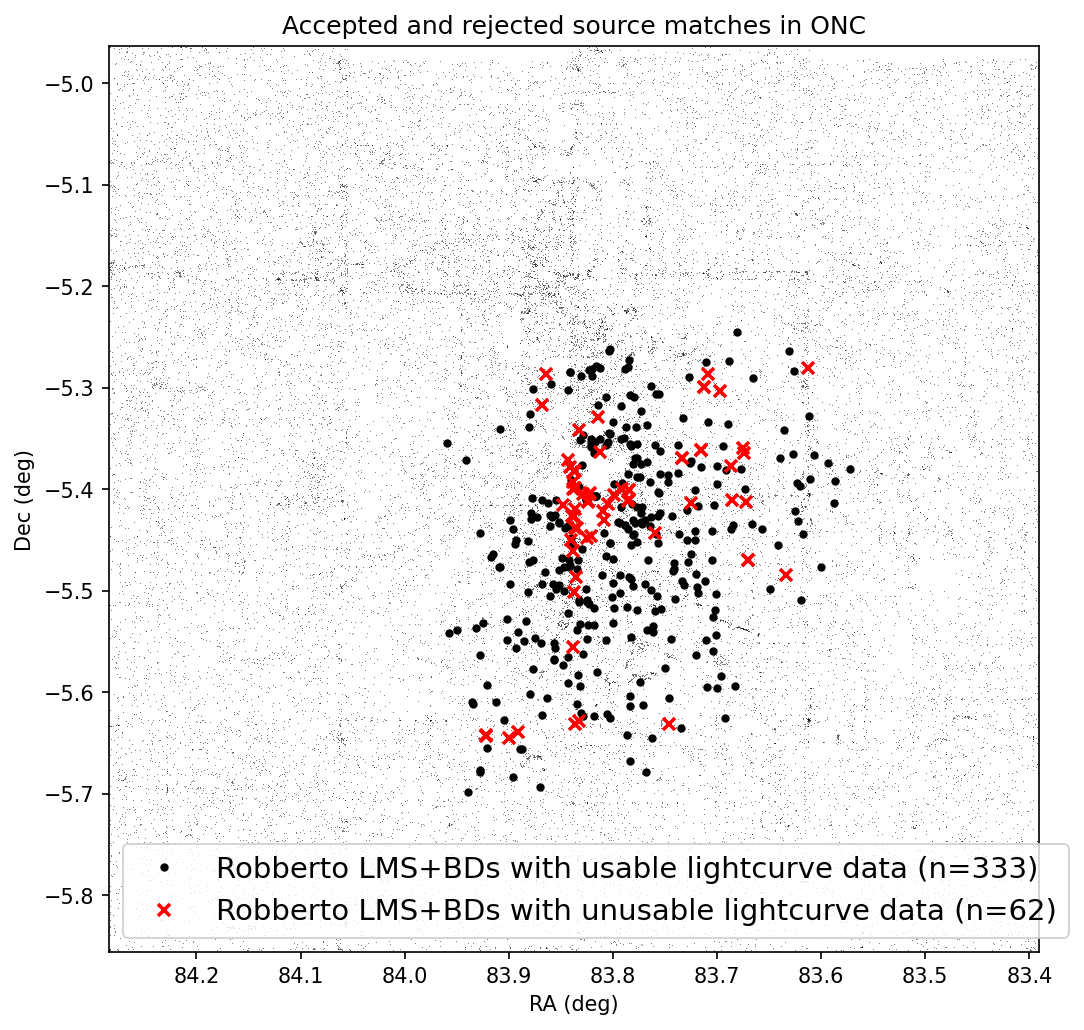

In [74]:
plt.figure(figsize=(8,8), dpi=150)

rejected_sources = inspect_onc['SOURCEID'][inspect_onc['exclude?'] == 'yes']
# inspect_onc['SOURCEID']

rejected_sources_indices = np.in1d(lowmass_joint_matches['SOURCEID'], rejected_sources)

plt.plot(np.degrees(onc_spread['median']['RA']), np.degrees(onc_spread['median']['DEC']), 'k,', alpha=0.5)

plt.plot(np.degrees(lowmass_joint_matches['RA'][~rejected_sources_indices]), np.degrees(lowmass_joint_matches['DEC'][~rejected_sources_indices]), 'k.', label='Robberto LMS+BDs with usable lightcurve data (n=333)')
plt.plot(np.degrees(lowmass_joint_matches['RA'][rejected_sources_indices]), np.degrees(lowmass_joint_matches['DEC'][rejected_sources_indices]), 'rx', ms=6, mew=1.7, label='Robberto LMS+BDs with unusable lightcurve data (n=62)')
plt.gca().invert_xaxis()
plt.xlabel("RA (deg)")
plt.ylabel("Dec (deg)")

plt.xlim(np.degrees(onc_spread['median']['RA'][onc_q.q2]).max(), np.degrees(onc_spread['median']['RA'][onc_q.q2]).min())
plt.ylim(np.degrees(onc_spread['median']['DEC']).min(), np.degrees(onc_spread['median']['DEC']).max())

plt.legend(fontsize=14, loc='lower left')
plt.title("Accepted and rejected source matches in ONC")

In [75]:
import pandas as pd

lc_dir = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/prototypes/BD_lcs_v3"
inspect_ngc = pd.read_csv(os.path.join(lc_dir, "inspection_ngc.csv"), skipinitialspace=True)

ngc_spread = spreadsheet.load_wserv_v2(7)
ngc_q = quality_classes.load_q(7)

Text(0.5, 1.0, 'Accepted and rejected source matches in NGC 1333')

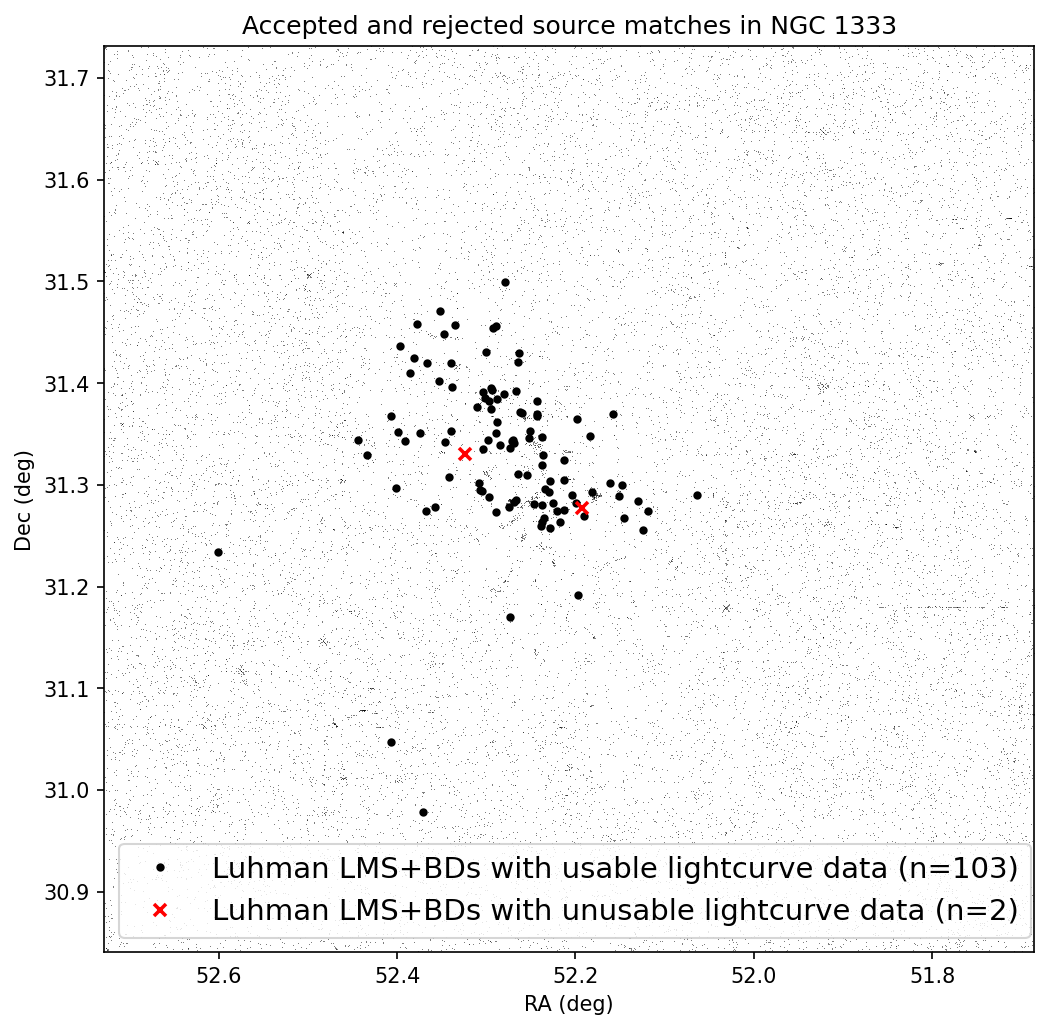

In [82]:
plt.figure(figsize=(8,8), dpi=150)

rejected_sources_ngc = inspect_ngc['SOURCEID'][inspect_ngc['exclude?'] == 'yes']
# inspect_onc['SOURCEID']

rejected_sources_ngc_ind = np.in1d(lowmass_ngc_joint_matches['SOURCEID'], rejected_sources_ngc)

plt.plot(np.degrees(ngc_spread['median']['RA']), np.degrees(ngc_spread['median']['DEC']), 'k,', alpha=0.5)

plt.plot(np.degrees(lowmass_ngc_joint_matches['RA'][~rejected_sources_ngc_ind]), np.degrees(lowmass_ngc_joint_matches['DEC'][~rejected_sources_ngc_ind]), 'k.', label='Luhman LMS+BDs with usable lightcurve data (n=103)')
plt.plot(np.degrees(lowmass_ngc_joint_matches['RA'][rejected_sources_ngc_ind]), np.degrees(lowmass_ngc_joint_matches['DEC'][rejected_sources_ngc_ind]), 'rx', ms=6, mew=1.7, label='Luhman LMS+BDs with unusable lightcurve data (n=2)')
plt.gca().invert_xaxis()
plt.xlabel("RA (deg)")
plt.ylabel("Dec (deg)")

plt.xlim(np.degrees(ngc_spread['median']['RA'][ngc_q.q2]).max(), np.degrees(ngc_spread['median']['RA'][ngc_q.q2]).min())
plt.ylim(np.degrees(ngc_spread['median']['DEC']).min(), np.degrees(ngc_spread['median']['DEC']).max())

plt.legend(fontsize=14, loc='lower left')
plt.title("Accepted and rejected source matches in NGC 1333")

In [85]:
import pandas as pd

lc_dir = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/prototypes/BD_lcs_v3"
inspect_ic = pd.read_csv(os.path.join(lc_dir, "inspection_ic.csv"), skipinitialspace=True)

ic_spread = spreadsheet.load_wserv_v2(8)
ic_q = quality_classes.load_q(8)

Text(0.5, 1.0, 'Accepted and rejected source matches in IC 348')

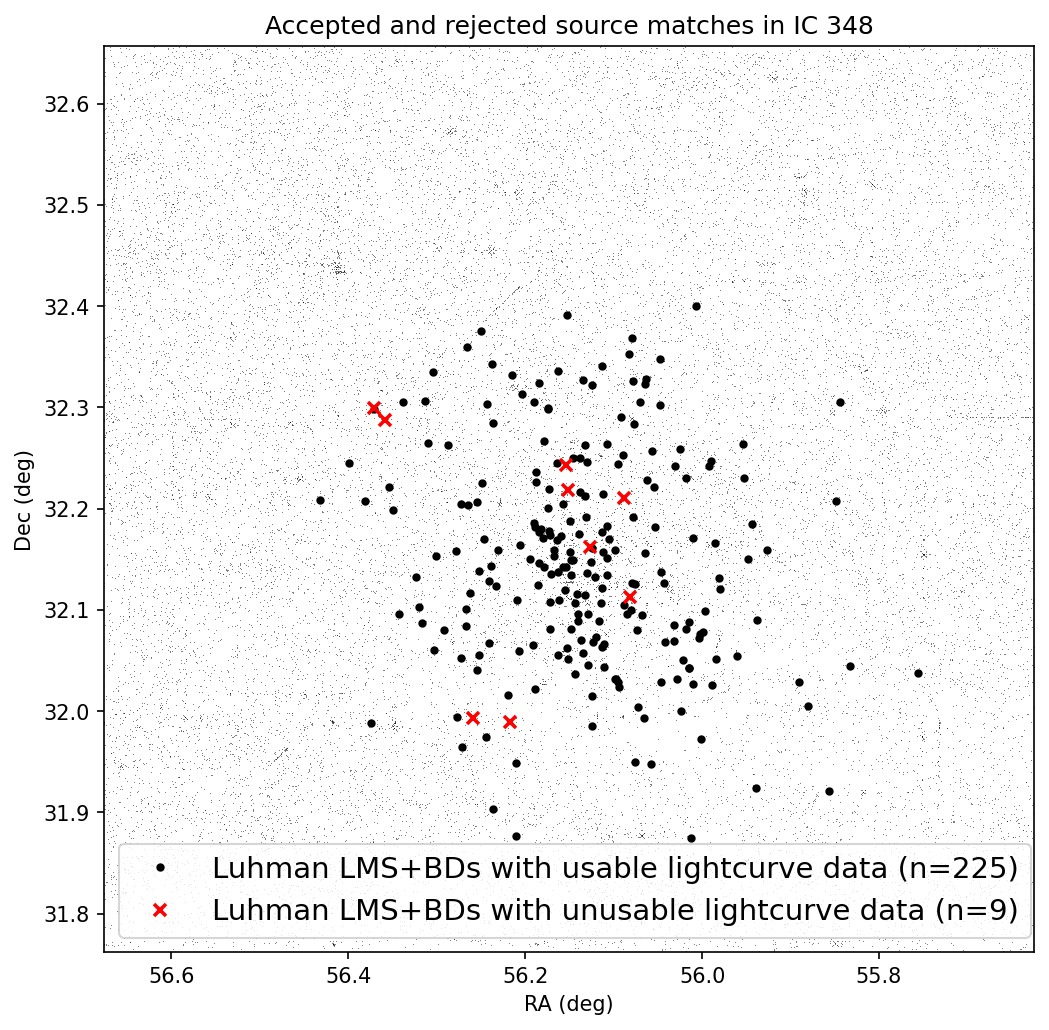

In [86]:
plt.figure(figsize=(8,8), dpi=150)

rejected_sources_ic = inspect_ic['SOURCEID'][inspect_ic['exclude?'] == 'yes']
# inspect_onc['SOURCEID']

rejected_sources_ic_ind = np.in1d(lowmass_ic_joint_matches['SOURCEID'], rejected_sources_ic)

plt.plot(np.degrees(ic_spread['median']['RA']), np.degrees(ic_spread['median']['DEC']), 'k,', alpha=0.5)

plt.plot(np.degrees(lowmass_ic_joint_matches['RA'][~rejected_sources_ic_ind]), np.degrees(lowmass_ic_joint_matches['DEC'][~rejected_sources_ic_ind]), 'k.', label='Luhman LMS+BDs with usable lightcurve data (n=225)')
plt.plot(np.degrees(lowmass_ic_joint_matches['RA'][rejected_sources_ic_ind]), np.degrees(lowmass_ic_joint_matches['DEC'][rejected_sources_ic_ind]), 'rx', ms=6, mew=1.7, label='Luhman LMS+BDs with unusable lightcurve data (n=9)')
plt.gca().invert_xaxis()
plt.xlabel("RA (deg)")
plt.ylabel("Dec (deg)")

plt.xlim(np.degrees(ic_spread['median']['RA'][ic_q.q2]).max(), np.degrees(ic_spread['median']['RA'][ic_q.q2]).min())
plt.ylim(np.degrees(ic_spread['median']['DEC']).min(), np.degrees(ic_spread['median']['DEC']).max())

plt.legend(fontsize=14, loc='lower left')
plt.title("Accepted and rejected source matches in IC 348")